In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
#export
import re

_camel_re1 = re.compile('(.)([A-Z][a-z]+)')
_camel_re2 = re.compile('([a-z0-9])([A-Z])')

def camel2snake(name):
    s1 = re.sub(_camel_re1, r'\1_\2', name)
    return re.sub(_camel_re2, r'\1_\2', s1).lower()

In [3]:
class Callback():
    _order=0
    def set_trainer(self, trainer): self.trainer=run
    def __getattr__(self, k): return getattr(self.trainer, k)

    def __call__(self, cb_name):
        f = getattr(self, cb_name, None)
        if f and f(): return True
        return False

In [ ]:
class LRFinder(Callback):
    _order=1
    def __init__(self, epochs, step_size, sched_funcs=triangular, base_lr=1e-6, max_lr=1e-2): 
        self.sched_funcs = sched_funcs
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.its = step_size * epochs
        self.iteration = 0
        self.history = {}
    
    def begin_fit(self):
        if not isinstance(self.sched_funcs, (list,tuple)):
            self.sched_funcs = [self.sched_funcs] * len(self.opt.param_groups)
        self.set_param(begin_cycle=True)

    def set_param(self, begin_cycle=False):
        assert len(self.opt.param_groups)==len(self.sched_funcs)
        for pg,f in zip(self.opt.param_groups,self.sched_funcs):
            lr = self.base_lr
            if not begin_cycle:
                # cur_its is an attribute of trainer
                lr = f(self.cur_its, self.step_size, 
                                      self.base_lr, self.max_lr)
            pg['lr'] = lr

    def after_batch(self):
        if self.in_train: self.set_param()

In [4]:
def triangular(current_iter, step_size, base_lr, max_lr):
    scale_func = lambda x: 1
    cycle = np.floor(1 + current_iter/(2*step_size))
    x = np.abs(current_iter/step_size - 2*cycle + 1)
    res = base_lr + (max_lr - base_lr) * max(0.0, 1.0-x) * scale_func(cycle)
    return res

In [5]:
def triangular_2(current_iter, step_size, base_lr, max_lr):
    scale_func = lambda x: 2. **(x-1)
    cycle = np.floor(1 + current_iter/(2*step_size))
    x = np.abs(current_iter/step_size - 2*cycle + 1)
    res = base_lr + (max_lr - base_lr) * np.maximum(0, 1-x) / scale_func(cycle)

    return res

In [15]:
def exp_range(current_iter, step_size, base_lr, max_lr, gamma=0.9996):
    scale_func = lambda x: gamma**(x)
    cycle = np.floor(1 + current_iter/(2*step_size))
    x = np.abs(current_iter/step_size - 2*cycle + 1)
    res = base_lr + (max_lr - base_lr) * np.maximum(0, 1-x) * scale_func(current_iter)

    return res

In [7]:
n_epochs = 14
iter_per_epoch = 500
step_size = 2 * iter_per_epoch
base_lr = 0.1
max_lr = 0.6
gamma = 0.99994

In [8]:
def plot_func(func):
    lr = base_lr
    lrs = []
    its = []
    for i in range(n_epochs*iter_per_epoch):
        lrs.append(lr)
        its.append(i)
        lr = func(i, step_size, base_lr, max_lr)
    plt.plot(its, lrs)    

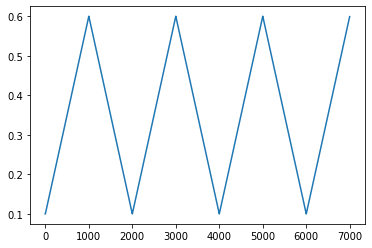

In [9]:
plot_func(triangular)

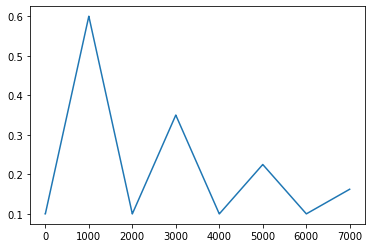

In [10]:
plot_func(triangular_2)

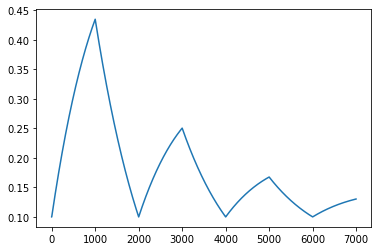

In [16]:
plot_func(exp_range)